In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [2]:
data=pd.read_csv(r'C:\Users\milan\Desktop\Python\Pakistan Largest Ecommerce Dataset.csv')

In [3]:
data

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data cleaning

In [4]:
data.shape

(1048575, 26)

In [5]:
#datatypes of the attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

Since last five columns have no values drop them

In [6]:
data.drop([ 'Unnamed: 21','Unnamed: 22', 'Unnamed: 23','Unnamed: 24','Unnamed: 25'], inplace = True, axis=1)

In [7]:
#Checking for missing value

In [8]:
data.isnull().sum()

item_id                  464051
status                   464066
created_at               464051
sku                      464071
price                    464051
qty_ordered              464051
grand_total              464051
increment_id             464051
category_name_1          464215
sales_commission_code    601226
discount_amount          464051
payment_method           464051
Working Date             464051
BI Status                464051
 MV                      464051
Year                     464051
Month                    464051
Customer Since           464062
M-Y                      464051
FY                       464051
Customer ID              464062
dtype: int64

<AxesSubplot:>

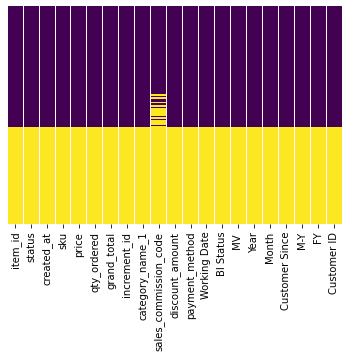

In [9]:
# Doing a visual inspection of all columns
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Observations

1.Records at 464051 indices (from the bottom) contain NaN values for all columns 

2.' MV ' is an ambiguous column name with extra spaces

3.Some of the columns have incorrect data types

# Preprocessing the data

In [10]:
#Exploring all columns, finding and Imputing for Null Values

In [11]:
data['status'].value_counts()

complete          233685
canceled          201249
received           77290
order_refunded     59529
refund              8050
cod                 2859
paid                1159
closed               494
payment_review        57
pending               48
processing            33
holded                31
fraud                 10
pending_paypal         7
\N                     4
exchange               4
Name: status, dtype: int64

Observations
There are a lot of labels for 'status' column.
Need to check if any relationship exists between 'status' and 'BI Status' colum

In [12]:
data.groupby('BI Status')['status'].value_counts()

BI Status  status        
#REF!      complete               1
Gross      canceled          201249
           payment_review        57
           pending               48
           processing            33
           holded                31
           fraud                 10
           pending_paypal         7
           \N                     4
Net        complete          233684
           closed               494
Valid      received           77290
           order_refunded     59529
           refund              8050
           cod                 2859
           paid                1159
           exchange               4
Name: status, dtype: int64

#Observations:
#All transactions marked as either 'complete' or 'closed', fall in the 'Net' category for 'BI Status'
#All transactions marked as 'received','paid','cod','exchanged' or something related to refund are marked in 'Valid' category
#All transactions marked as either 'canceled' or something to do with incomplete transation are marked in 'Gross' category

In [13]:
data['status'] = data['status'].replace('complete', 'Completed')
data['status'] = data['status'].replace('closed', 'Completed')
data['status'] = data['status'].replace('received', 'Completed')
data['status'] = data['status'].replace('paid', 'Completed')
data['status'] = data['status'].replace('cod', 'Completed')
data['status'] = data['status'].replace('order_refunded', 'Refund')
data['status'] = data['status'].replace('refund', 'Refund')
data['status'] = data['status'].replace('exchange', 'Refund')
data['status'] = data['status'].replace('pending', 'Pending')
data['status'] = data['status'].replace('payment_review', 'Pending')
data['status'] = data['status'].replace('processing', 'Pending')
data['status'] = data['status'].replace('holded', 'Pending')
data['status'] = data['status'].replace('pending_paypal', 'Pending')
data['status'] = data['status'].replace(r'\\N', 'Pending', regex=True)
data['status'] = data['status'].replace('fraud', 'Fraud')
data['status'] = data['status'].replace('canceled', 'Cancelled')

In [14]:
data['status'].value_counts()

Completed    315487
Cancelled    201249
Refund        67583
Pending         180
Fraud            10
Name: status, dtype: int64

In [15]:
data['BI Status'] = data['BI Status'].replace('#REF!', 'Net')

In [16]:
data['BI Status'].value_counts()

Net      234179
Gross    201454
Valid    148891
Name: BI Status, dtype: int64

In [17]:
data[data['status'].isnull()]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
477519,783751.0,NaN,3/15/2018,OTHPCB5A7D8A0BD10E8,8000.0,1.0,8000.0,100479380,Others,NaN,...,cod,3/15/2018,Gross,"8,000",2018.0,3.0,2018-3,3-2018,FY18,95141.0
513736,827187.0,NaN,4/16/2018,KABOXF5ABCC75C7E2F7-32,370.0,1.0,2707.0,100513933,Kids & Baby,NaN,...,cod,4/16/2018,Gross,370,2018.0,4.0,2018-4,4-2018,FY18,105059.0
513737,827189.0,NaN,4/16/2018,KABSHO5AA77C331466F-11-13 Years,473.0,1.0,2707.0,100513933,Kids & Baby,NaN,...,cod,4/16/2018,Gross,473,2018.0,4.0,2018-4,4-2018,FY18,105059.0
513738,827191.0,NaN,4/16/2018,KABBIN5A93E074C501A-8-9 Years,749.0,1.0,2707.0,100513933,Kids & Baby,NaN,...,cod,4/16/2018,Gross,749,2018.0,4.0,2018-4,4-2018,FY18,105059.0
513739,827193.0,NaN,4/16/2018,KABLIT59AC117FD51C4-12-13 Years,692.0,1.0,2707.0,100513933,Kids & Baby,NaN,...,cod,4/16/2018,Gross,692,2018.0,4.0,2018-4,4-2018,FY18,105059.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Replacing NaN values with label 'Cancelled' in the data
data['status'].fillna("Cancelled",inplace=True)

In [19]:
data

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,Completed,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,cod,7/1/2016,Net,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,Cancelled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,Cancelled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,Completed,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,Refund,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,Cancelled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,Cancelled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,Cancelled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,Cancelled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Handling NaN values in 'category_name_1' column

In [21]:
data['category_name_1'].value_counts()

Mobiles & Tablets     115710
Men's Fashion          92221
Women's Fashion        59721
Appliances             52413
Superstore             43613
Beauty & Grooming      41496
Soghaat                34011
Others                 29218
Home & Living          26504
Entertainment          26326
Health & Sports        17502
Kids & Baby            16494
Computing              15933
\N                      7850
School & Education      3478
Books                   1870
Name: category_name_1, dtype: int64

In [22]:
#Replacing the unicode label and NaN values with label 'Unknown'
data['category_name_1'] = data['category_name_1'].replace(r'\\N', 'Unknown', regex=True)
data['category_name_1'].fillna("Unknown",inplace=True)


In [23]:
#Handling NaN values in 'sku' column
data[data['sku'].isnull()]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
14846,230008.0,Cancelled,8/13/2016,NaN,0.0,1.0,0.0,100160070,Unknown,\N,...,cod,8/13/2016,Gross,-,2016.0,8.0,2016-8,8-2016,FY17,3468.0
20676,236830.0,Cancelled,9/1/2016,NaN,0.0,1.0,0.0,100164902,Unknown,\N,...,cod,9/1/2016,Gross,-,2016.0,9.0,2016-8,9-2016,FY17,4369.0
39838,260006.0,Cancelled,10/7/2016,NaN,0.0,1.0,0.0,100181136,Unknown,\N,...,cod,10/7/2016,Gross,-,2016.0,10.0,2016-7,10-2016,FY17,939.0
39839,260007.0,Cancelled,10/7/2016,NaN,0.0,3.0,0.0,100181137,Unknown,\N,...,cod,10/7/2016,Gross,-,2016.0,10.0,2016-7,10-2016,FY17,939.0
39880,260061.0,Cancelled,10/7/2016,NaN,0.0,3.0,0.0,100181174,Unknown,\N,...,cod,10/7/2016,Gross,-,2016.0,10.0,2016-7,10-2016,FY17,939.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,Cancelled,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,Cancelled,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,Cancelled,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,Cancelled,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#Replace NaN values with a new sku code 'Missing'
data['sku'].fillna("Missing",inplace=True)

In [25]:
#Handling missing values in 'Sales_commission_code' column
data['sales_commission_code'].value_counts()

\N             339001
40968            2710
C-LHW-50074      2434
C-RWP-31924      1720
cisb30211        1613
                ...  
5.74568E+11         1
R-KHE-10393         1
R-rwp-90940         1
1063653873          1
CSKZ 30472          1
Name: sales_commission_code, Length: 7226, dtype: int64

In [26]:
data[data['sales_commission_code'].isnull()]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
135887,381711.0,Completed,1/4/2017,jockey_J260-1013-3-M,715.0,1.0,1714.0,100256851,Men's Fashion,NaN,...,cod,1/4/2017,Net,715,2017.0,1.0,2016-10,1-2017,FY17,11660.0
135888,381713.0,Completed,1/4/2017,BO_nonRC-Jeep-Silver,250.0,1.0,1714.0,100256851,Kids & Baby,NaN,...,cod,1/4/2017,Net,250,2017.0,1.0,2016-10,1-2017,FY17,11660.0
135889,381714.0,Completed,1/4/2017,aybeez_ABZ-3338-M,299.0,1.0,1714.0,100256851,Men's Fashion,NaN,...,cod,1/4/2017,Net,299,2017.0,1.0,2016-10,1-2017,FY17,11660.0
135890,381716.0,Completed,1/4/2017,PC_3P COMBED-008,450.0,1.0,1714.0,100256851,Men's Fashion,NaN,...,cod,1/4/2017,Net,450,2017.0,1.0,2016-10,1-2017,FY17,11660.0
281723,557053.0,Completed,8/10/2017,JSM_JSM-003-ComboGreenWhitePakShirt-M,180.0,2.0,360.0,100345578,Unknown,NaN,...,cod,8/10/2017,Net,360,2017.0,8.0,2016-11,8-2017,FY18,17022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,Cancelled,NaN,Missing,NaN,NaN,NaN,NaN,Unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,Cancelled,NaN,Missing,NaN,NaN,NaN,NaN,Unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,Cancelled,NaN,Missing,NaN,NaN,NaN,NaN,Unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,Cancelled,NaN,Missing,NaN,NaN,NaN,NaN,Unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#Replacing NaN and unicode values with 'Missing'
data['sales_commission_code'].fillna("Missing",inplace=True)
data['sales_commission_code'] = data['sales_commission_code'].replace(r'\\N', 'Missing', regex=True)

In [32]:
#Handling missing values in 'Customer ID' and 'Customer Since' columns
data[data['Customer ID'].isnull()]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
427377,726862.0,Refund,1/5/2018,BAGLOR5A12C5C756AE5,209.0,1.0,1074.0,100443451,Beauty & Grooming,Missing,...,cod,1/5/2018,Valid,209,2018.0,1.0,NaN,1-2018,FY18,NaN
427378,726863.0,Refund,1/5/2018,WOFGUL59C24CC9BE5D9,720.0,1.0,1074.0,100443451,Women's Fashion,Missing,...,cod,1/5/2018,Valid,720,2018.0,1.0,NaN,1-2018,FY18,NaN
427379,726864.0,Refund,1/5/2018,BAGNAD59E0AAC250E6D,145.0,1.0,1074.0,100443451,Beauty & Grooming,Missing,...,cod,1/5/2018,Valid,145,2018.0,1.0,NaN,1-2018,FY18,NaN
437567,738191.0,Refund,1/31/2018,MEFMUN5A0ACC3A894BE-9,999.0,1.0,1149.0,100449683,Men's Fashion,Missing,...,cod,1/31/2018,Valid,999,2018.0,1.0,NaN,1-2018,FY18,NaN
478699,784981.0,Completed,3/15/2018,OTHPCB5A7D8A0DA56C6,8000.0,2.0,16000.0,100480546,Others,Missing,...,Payaxis,3/15/2018,Valid,"16,000",2018.0,3.0,NaN,3-2018,FY18,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,Cancelled,NaN,Missing,NaN,NaN,NaN,NaN,Unknown,Missing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,Cancelled,NaN,Missing,NaN,NaN,NaN,NaN,Unknown,Missing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,Cancelled,NaN,Missing,NaN,NaN,NaN,NaN,Unknown,Missing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,Cancelled,NaN,Missing,NaN,NaN,NaN,NaN,Unknown,Missing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


All 11 records are from FY18, with The first record from 01-2018.
For keeping the records in dataset for analysis, a fake 'Customer ID' value of '0' can be assigned with '01-2018' assigned to all records in 'Customer Since' column

In [34]:
data['Customer ID'].fillna("0",inplace=True)
data['Customer Since'].fillna("1-2018",inplace=True)

In [ ]:
#Checking for Null values again

In [35]:
data.isnull().sum()

item_id                  464051
status                        0
created_at               464051
sku                           0
price                    464051
qty_ordered              464051
grand_total              464051
increment_id             464051
category_name_1               0
sales_commission_code         0
discount_amount          464051
payment_method           464051
Working Date             464051
BI Status                464051
 MV                      464051
Year                     464051
Month                    464051
Customer Since                0
M-Y                      464051
FY                       464051
Customer ID                   0
dtype: int64